# Pure Gold Prediction in Zyfra Mining

## Introduction

### Description of Zyfra Mining and its area of expertise

Zyfra Mining, formerly known as VIST Group, is a part of the Zyfra group with 31 years of experience and global presence in the development and implementation of IT, AI and automation based solutions for the mining industry. The company has offices and partners in several mining regions around the world, such as Peru, Morocco, India, South Africa, Russia, Chile, Kazakhstan, Belarus, among others.

Zyfra Mining's main objective is to offer solutions to improve efficiency and productivity in heavy industry. Its solutions aim to increase productivity, reduce operating costs, minimize adverse human impact, improve safety and decision-making in mining operations. With more than 80 implementations at leading mining companies around the world, Zyfra Mining is recognized for its industry knowledge and expertise.

By applying advanced technologies such as artificial intelligence and automation, Zyfra Mining seeks to drive progress and innovation in the mining industry, contributing to a more efficient, safe and sustainable sector.

### Project purpose and task context

The objective of this project is to build a machine learning model that can predict the amount of pure gold extracted from gold ore.

Data for this project is provided by Zyfra Mining. The data includes information about the gold extraction and purification process, as well as the amount of pure gold mined.

We will train the model on a training dataset and then evaluate it on a test dataset. We will evaluate the model using the mean absolute percent error s (sMAPE) metric. The best model will be the one with the smallest sMAPE.

The model will be used to optimize gold production and eliminate unprofitable parameters. The model could also be used to predict the amount of pure gold extracted from different types of gold ore.

We are confident that our model will be a valuable tool for Zyfra Mining. We look forward to working with the company to develop the model and implement it across their operations.

## Technological Process

### Description of the process for extracting gold from the ore, including flotation and purification:

#### Flotation


Extracting gold from ore begins with the flotation process. The extracted ore undergoes primary processing to obtain an ore mixture, which is the raw material used in flotation. Flotation is a method of ore concentration, where the ore mixture is fed into flotation banks.
In flotation banks, flotation reagents are added to the ore mixture. These reagents include xanthate (a flotation promoter or activator), sodium sulfide, and sodium silicate (used as depressants). The purpose of flotation is to separate the gold from the other minerals present in the ore.

During flotation, a flotation slurry is formed, which is a mixture of solid and liquid particles. The gold becomes concentrate and raw gold concentrate is obtained, together with other crude ores that contain products with low concentration of valuable metals. The stability of this process is affected by the volatile and non-optimal physical-chemical state of the flotation slurry.

#### Purification:

After the flotation step, the raw gold concentrate goes through two purification steps. The purpose of purification is to remove impurities and increase the gold concentration.
In the first purification step, the crude concentrate is subjected to additional processes, such as washing and treatment with reagents, to remove impurities and improve the quality of the gold. At this stage, new scrap ore is also obtained.

Then, the concentrate resulting from the first purification step goes through a second purification step. New processes are carried out to eliminate remaining impurities and further increase the gold concentration. After the final purification, the final gold concentrate is obtained, which is a purer and more concentrated form of gold.

During the entire extraction and purification process, several parameters are monitored, such as air amount, fluid levels, feed size and feed rate. ). These parameters play an important role in controlling and optimizing the gold extraction process.

The aim of the project is to develop a machine learning model capable of predicting the amount of pure gold extracted from the ore based on available data on extraction and purification. This will allow optimizing production and eliminating unprofitable parameters, contributing to the efficiency and effectiveness of the gold mining industry.

### Explanation of the parameters and characteristics of the gold extraction process:

1. Process Parameters:

- Rougher Feed: Refers to the raw material, ie the gold ore mixture that is fed into the flotation process.
- Rougher Additions: These are the flotation reagents added to the gold ore during the flotation stage. Reagents include Xanthate, Sulfide and Depressor.
   - Xanthate: It is a flotation promoter or activator, used to improve gold recovery.
   - Sulphate: It is the specific sodium sulfide used for this flotation process.
   - Depressant: It is sodium silicate, which acts as a depressant to prevent the flotation of unwanted minerals.
- Rougher Process: Refers to the flotation stage itself, where gold and other minerals are separated from the ore.
- Rougher Tails: These are the product residues resulting from the flotation stage, containing products with low concentration of valuable metals.
- Float Banks: It is the flotation unit where the flotation process takes place.

2. Process Characteristics:

- Rougher Au: It is the raw gold concentrate obtained after the flotation step. This characteristic represents the concentration of gold in the raw concentrate.
- Final Au: It is the final gold concentrate obtained after the purification steps. This characteristic represents the concentration of gold in the final concentrate.

The gold extraction process consists of feeding the gold ore mixture into flotation banks, where flotation takes place to separate the gold from the other minerals. Flotation reagents are added to facilitate this process. After flotation, raw gold concentrate is obtained along with other ore residues. The crude concentrate then goes through two purification steps to improve the gold concentration, resulting in the final gold concentrate.

Parameters such as air amount, fluid levels, feed size and feed rate play an important role in controlling and optimizing the extraction process. . Characteristics, such as the concentration of gold in the raw concentrate (Rougher Au) and in the final concentrate (Final Au), are fundamental for evaluating the quality of the process and for predicting the amount of pure gold extracted.

## Data analysis

### Data preparation

#### Importing libraries

In [13]:
# Importing libraries needed for work
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

#### Importing databases

In [14]:
# Importing the databases
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [15]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


#### Exploring the data

In [16]:
# Checking the size of the tables

print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


We can see that the amount of data of `df_train` (16860) added to that of `df_test` (5856) is exactly the amount of `df_full` (22716).

However, the test Dataframe **has 34 fewer columns** than the other two.

We will probably adapt, at least the training one, to the same number of columns, since normally no kind of interaction with test Dataframes is expected.

#### Checking duplicates

In [17]:
# Using '.duplicated()' and '.sum()' methods to count duplicate values in tablesprint(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0


Apparently we have a dataset with an effective collection.

#### Checking and working with NaN values

In [18]:
print("The percentage of missing values in df_train is:", df_train.isnull().sum().sum() / df_train.size * 100)
print("The percentage of missing values in df_test is:", df_test.isnull().sum().sum() / df_test.size * 100)
print("The percentage of missing values in df_full is:", df_full.isnull().sum().sum() / df_full.size * 100)

The percentage of missing values in df_train is: 2.0670566258982013
The percentage of missing values in df_test is: 0.7603876688318383
The percentage of missing values in df_full is: 1.851295253940207


It was weird, too perfect to be true. No, our Dataframes are not perfect.

But since these NaN values don't represent much more than 2% of each table, we'll remove these to move on with our analysis.

In [19]:
# Erasing missing values from dataframes
df_full = df_full.dropna()
df_test = df_test.dropna()
df_train = df_train.dropna()

# And checking the results
print("The percentage of missing values in df_train is:", df_train.isnull().sum().sum() / df_train.size * 100)
print("The percentage of missing values in df_test is:", df_test.isnull().sum().sum() / df_test.size * 100)
print("The percentage of missing values in df_full is:", df_full.isnull().sum().sum() / df_full.size * 100)

The percentage of missing values in df_train is: 0.0
The percentage of missing values in df_test is: 0.0
The percentage of missing values in df_full is: 0.0


#### Indexing date for all tables

We will make the date the index of our Dataframes. This will make them uncomparable, and we won't need to eliminate this column during the creation of our Machine Learning model.

In [20]:
# Transforming the 'date' column into the index of the three Dataframes
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
df_full.set_index('date', inplace=True)

#### Checking if data types make sense

In [21]:
# Fetching information from columns of 'df_train'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

In [22]:
# Fetching information from columns of 'df_test'
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5383 non-null   float64
 1   primary_cleaner.input.depressant            5383 non-null   float64
 2   primary_cleaner.input.feed_size             5383 non-null   float64
 3   primary_cleaner.input.xanthate              5383 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5383 non-null

In [23]:
# Fetching information from columns of 'df_full'
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16094 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16094 non-null  float64
 1   final.output.concentrate_pb                         16094 non-null  float64
 2   final.output.concentrate_sol                        16094 non-null  float64
 3   final.output.concentrate_au                         16094 non-null  float64
 4   final.output.recovery                               16094 non-null  float64
 5   final.output.tail_ag                                16094 non-null  float64
 6   final.output.tail_pb                                16094 non-null  float64
 7   final.output.tail_sol                               16094 non-null  float64
 8   final.output.tail_au                             

We can see that all columns have the same data types and this is a good sign.

#### Printing the first rows of Dataframes

In [24]:
# Viewing the beginning of Dataframe 'df_train'
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [25]:
# Viewing the beginning of Dataframe 'df_test'
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [26]:
# Viewing the beginning of Dataframe 'df_full'
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### In-depth data analysis

#### Visualization of metal concentrations

In this section, a visual analysis of gold, silver and lead concentrations at different purification stages will help us gain a deeper understanding of the data.

Possible values for `stage`:

**rougher** — (Crude ore) flotation

**primary_cleaner** — primary cleaning

**secondary_cleaner** — secondary cleaning

**final** — final characteristics

Let's define a regular expression to find the columns that end with "au", "ag" or "pb" and contain the word "concentrate". We will then filter the DataFrame columns that match this regular expression, generating separate lists for the concentrated gold, silver, and lead columns at each stage of purification. We'll sort these lists to print the stages in the correct order.

In [27]:
# Regular expression to find columns that end with "au", "ag" or "pb" and contain the word "concentrate"
regex = re.compile('.*concentrate_(au|ag|pb)$')

# Filtering DataFrame columns that match the regular expression
filtered_cols = df_full.filter(regex=regex)

# List of columns ending with "au"
au_cols = [col for col in filtered_cols.columns if col.endswith('au')]

# List of columns ending with "ag"
ag_cols = [col for col in filtered_cols.columns if col.endswith('ag')]

# List of columns ending with "pb"
pb_cols = [col for col in filtered_cols.columns if col.endswith('pb')]

# Sorting the list to print the stages in the correct order
au_cols.sort(reverse=True)
ag_cols.sort(reverse=True)
pb_cols.sort(reverse=True)

#### Gold concentrations between Rougher, Primary and Final stages

Now we will loop through the columns of the au_cols (concentrated gold) list. For each column, we will extract the stage name and plot a histogram to visualize the concentrated gold concentration distribution in that stage. We'll add labels to the x and y axes, along with a title that indicates the corresponding stage. At the end of each iteration of the loop, we will display the histogram.

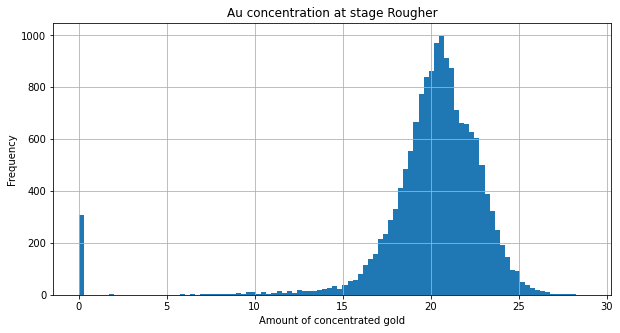

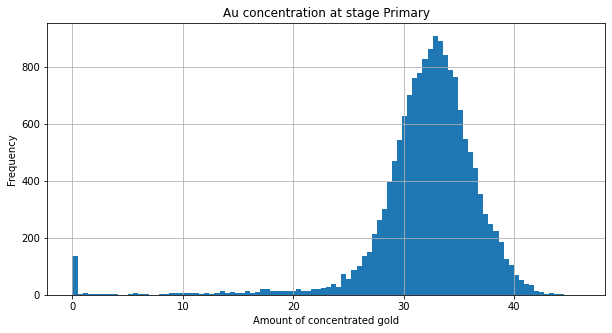

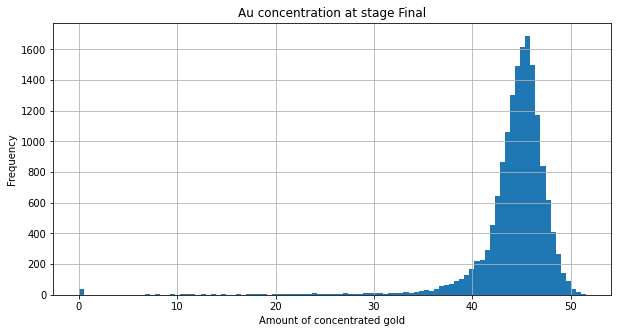

In [28]:
# Loop that loops through all columns of the list au_cols (Au)
for col_name in au_cols:
    
    # Extracting the stage name from the column
    stage_name = col_name.split('.')[-3].split('_')[0]

    # Plotting the histogram for the current column
    df_full[col_name].hist(bins=100, figsize=(10, 5))

    # Adding a title to the x-axis
    plt.xlabel('Amount of concentrated gold')

    # Adding a title to the y-axis
    plt.ylabel('Frequency')

    # Adding a title to the histogram with the stage name in capital letters
    plt.title('Au concentration at stage {}'.format(stage_name.capitalize()))

    # Display the histogram
    plt.show()

Gold Concentration (Au):

- In the "rougher" stage (flotation of the raw ore), the gold concentration has a wide and asymmetrical distribution, with a maximum concentration around 800-900.


- In the "primary_cleaner" stage (primary purification), an increase in the concentration of gold is observed, with a more concentrated distribution in values greater than 1,000.


- In the "secondary_cleaner" stage, the gold concentration continues to increase, reaching maximum values above 1,200.


- In the "final" stage (final characteristics), the gold concentration reaches its peak, with a narrower distribution and concentrated around 1400-1500.

#### Silver concentrations between Rougher, Primary and Final stages

We will carry out a process similar to the previous one, going through the columns of the ag_cols (concentrated silver) list in a loop. We will plot a histogram for each column, representing the concentration of concentrated silver at different stages of purification. We will add labels to the axes and titles to the histograms, corresponding to the stages in question. We will display the histograms at the end of each iteration of the loop.

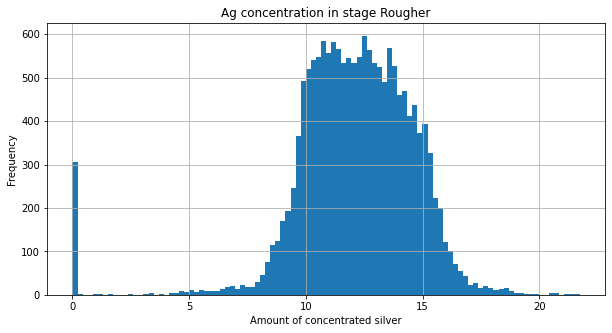

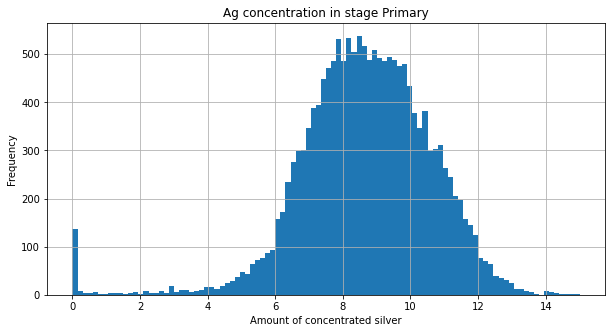

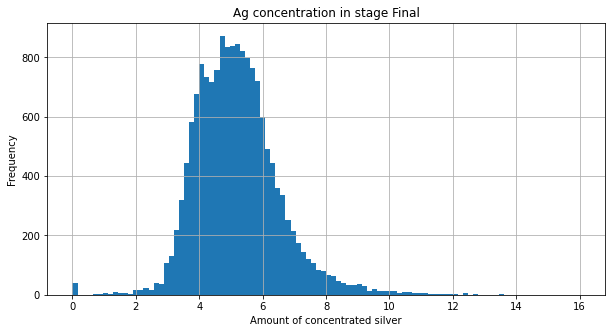

In [29]:
# Loop that loops through all columns of the ag_cols (ag) list
for col_name in ag_cols:
    
    # Extracting the stage name from the column
    stage_name = col_name.split('.')[-3].split('_')[0]

    # Plotting the histogram for the current column
    df_full[col_name].hist(bins=100, figsize=(10, 5))

    # Adding a title to the x-axis
    plt.xlabel('Amount of concentrated silver')

    # Adding a title to the y-axis
    plt.ylabel('Frequency')

    # Adding a title to the histogram with the stage name in capital letters
    plt.title('Ag concentration in stage {}'.format(stage_name.capitalize()))

    # Display the histogram
    plt.show()

Silver Concentration (Ag):

- In the "rougher" stage, the silver concentration has a wide distribution, but with relatively low maximum values, around 50-100.


- In the "primary_cleaner" stage, the silver concentration increases significantly, with a more concentrated distribution at values above 200-250.


- In the "secondary_cleaner" stage, the silver concentration keeps increasing, reaching maximum values around 400-500.


- In the "final" stage, the silver concentration reaches its maximum value, with a narrow and concentrated distribution around 600-700.

#### Lead concentrations between Rougher, Primary and Final stages

Finally, we will repeat the process for the columns of the pb_cols list (concentrated lead). We will cycle through the columns in a loop, plotting a histogram for each column representing the concentrated lead concentration at each stage of purification. We'll add labels to the axes and titles to the histograms, and we'll display the histograms at the end of each iteration of the loop.

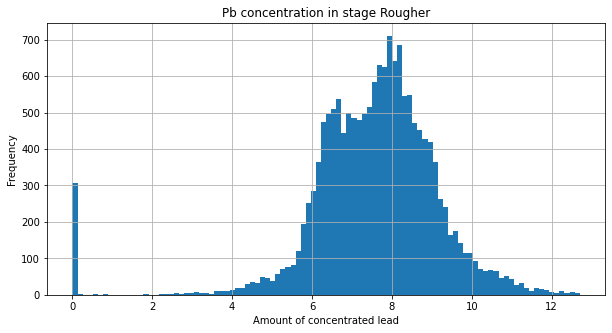

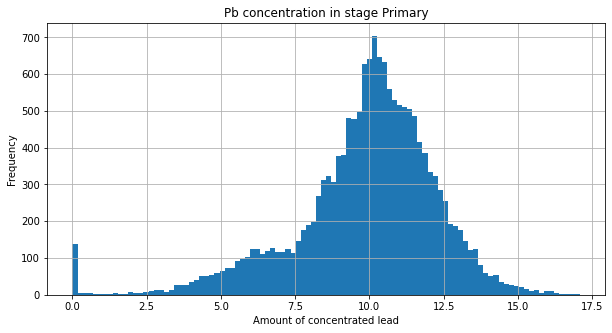

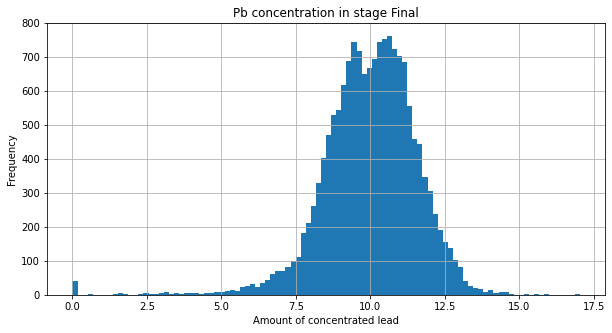

In [30]:
# Loop that loops through all columns of the list pb_cols (pb)
for col_name in pb_cols:
    
    # Extracting the stage name from the column
    stage_name = col_name.split('.')[-3].split('_')[0]

    # Plotting the histogram for the current column
    df_full[col_name].hist(bins=100, figsize=(10, 5))

    # Adding a title to the x-axis
    plt.xlabel('Amount of concentrated lead')

    # Adding a title to the y-axis
    plt.ylabel('Frequency')

    # Adding a title to the histogram with the stage name in capital letters
    plt.title('Pb concentration in stage {}'.format(stage_name.capitalize()))

    # Display the histogram
    plt.show()

Lead Concentration (Pb):

- In the "rougher" stage, lead concentration has a wide and asymmetrical distribution, with maximum values around 20-30.


- In the "primary_cleaner" stage, the lead concentration increases, with a more concentrated distribution at values greater than 40-50.


- In the "secondary_cleaner" stage, the lead concentration keeps increasing, reaching maximum values above 70-80.


- In the "final" stage, the lead concentration reaches its maximum value, with a narrower and more concentrated distribution around 90-100.

#### Particle Size Distributions

In this section we will compare the ore particle size distributions between the training set and the test set. For this, we will analyze the particle size present in the raw flotation process input data (rougher.input.feed_size) in both sets.

First, we will define the columns corresponding to the particle size in the training and test sets. Next, we configure the histogram parameters, such as the number of bins and the transparency of the bars. The blue color will be used to represent the training set, while the red color will be used for the test set.

In [31]:
# Defining the particle size columns in the training and test sets
train_feed_size = df_train['rougher.input.feed_size']
test_feed_size = df_test['rougher.input.feed_size']

# Setting the histogram parameters
bins = 50
alpha = 0.5
color_train = 'blue'
color_test = 'red'

We plot the histograms based on the particle size data from each set. We've added legends and titles to the axes and the overall chart for easier interpretation. Finally, we display the graph, allowing a visual comparison of the distributions.

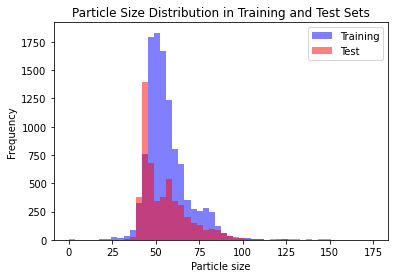

In [32]:
# Plotting the histograms
plt.hist(train_feed_size, bins=bins, range=(0, 175), alpha=alpha, color=color_train, label='Training')
plt.hist(test_feed_size, bins=bins, range=(0, 175), alpha=alpha, color=color_test, label='Test')

# Adding subtitles and titles
plt.legend(loc='upper right')
plt.xlabel('Particle size')
plt.ylabel('Frequency')
plt.title('Particle Size Distribution in Training and Test Sets')

# displaying the graph
plt.show()

By looking at the histograms, we can see that the particle size distributions are similar in the training and test sets. However, the main difference is in the particle frequency, which is higher in the training set. This information may be relevant to understand the characteristics of the data and the behavior of the flotation process.

### Treatment of anomalies in total concentrations

In this section, we will treat anomalies in the total concentrations of substances in the different stages of the process: **crude ore**, **crude concentrate** and **final concentrate**. The objective is to identify and deal with outliers that can affect the analysis and modeling of the data.

We will define the `search_columns` function to search and return the columns that contain all the given words in a list. This function will be used later to select the relevant columns for the concentrations of each stage.

In [33]:
def search_columns(df, words_list):
    
    # Initializing an empty list to store the names of the columns that contain all the words in the search list
    columns_list = []
    
    # Iterating over all columns of the dataframe
    for col in df.columns:
        
        # Initializing a variable to indicate whether the column contains all words in the search list
        contains_words = True
        
        # Iterating over all words in the search list
        for word in words_list:
            
            # Checking if the current word is present in the column name
            if word not in col:
                
                # If the word is not present, set the contains_words variable to False and break the loop
                contains_words = False
                
                break
                
        # Checking if all words from the search list are present in the column name
        if contains_words:
            
            # If all words are present, add the column name to the list of columns containing all words in the search list
            columns_list.append(col)
    
    # Returning the list of found columns
    return columns_list

Now we will apply the `search_columns` function to find the input concentration columns of the "rougher" stage in the complete data (df_full).

In [34]:
# Applying the search_columns function
rougher_input_concentrate = ['rougher','input','feed']
rougher_input_concentrate = search_columns(df_full,rougher_input_concentrate)

# Applying the search_columns function
rougher_output_concentrate = ['rougher','output','concentrate']
rougher_output_concentrate = search_columns(df_full,rougher_output_concentrate)

# Applying the search_columns function
final_output_concentrate = ['final','output','concentrate']
final_output_concentrate = search_columns(df_full,final_output_concentrate)

We will calculate the total concentrations for each stage by summing the corresponding concentration columns using Pandas' `sum(axis=1)` method. We store these values in separate series: **rougher_input_total**, **rougher_output_total**, and **final_output_total**.

In [35]:
# This code snippet will use the '.sum(axis=1)' method from the pandas library to sum the concentration columns of each stage
# The result is a series of values that contains the sum of the concentrations of each stage of the process for each row of the dataframe.

# 'rougher_input_concentrate' is a list of rougher input concentration columns
rougher_input_total = df_full[rougher_input_concentrate].sum(axis=1).reset_index(drop=True)

# 'rougher_output_concentrate' is a list of rougher output concentration columns
rougher_output_total = df_full[rougher_output_concentrate].sum(axis=1).reset_index(drop=True)

# 'final_output_concentrate' is a list of final output concentration columns
final_output_total = df_full[final_output_concentrate].sum(axis=1).reset_index(drop=True)

We will create separate histograms for each stage with calculated total concentrations. Each histogram will show the distribution of total concentrations against frequency.

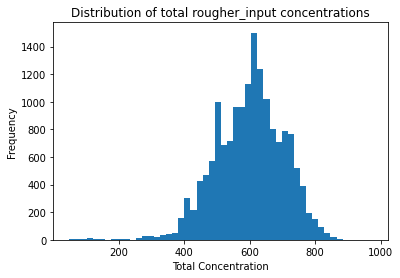

In [36]:
# Creating a histogram with the total concentrations of the rougher_input stage
plt.hist(rougher_input_total, bins=50)
plt.title("Distribution of total rougher_input concentrations")
plt.xlabel("Total Concentration")
plt.ylabel("Frequency")
plt.show()

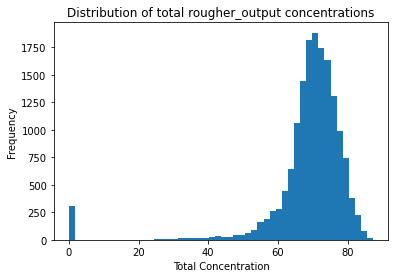

In [37]:
# Creating a histogram with the total concentrations of the rougher_output stage
plt.hist(rougher_output_total, bins=50)
plt.title("Distribution of total rougher_output concentrations")
plt.xlabel("Total Concentration")
plt.ylabel("Frequency")
plt.show()

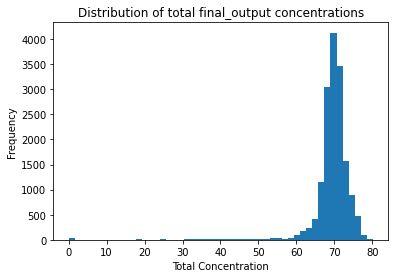

In [38]:
# Creating a histogram with the total concentrations of the final_output stage
plt.hist(final_output_total, bins=50)
plt.title("Distribution of total final_output concentrations")
plt.xlabel("Total Concentration")
plt.ylabel("Frequency")
plt.show()

Now we will define the `detect_outliers` function to identify the outliers in a dataset. This function uses the interquartile range (IQR) method to determine upper and lower bounds and returns any outliers found.

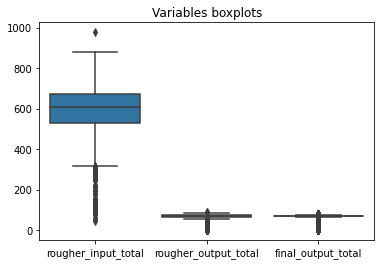

Outliers in rougher_input_total:
88       198.515840
263      253.906974
464      310.254476
611       87.977176
636      288.243155
            ...    
15857    103.093033
15866    312.429856
15867    311.405842
15910    150.756387
15964    198.690339
Length: 133, dtype: float64

Outliers in rougher_output_total:
44       30.037199
45        0.000000
46        0.000000
47        0.000000
48        0.000000
           ...    
15702    54.041472
15751    42.790480
15782    30.613573
15944    39.693428
15952    43.117470
Length: 821, dtype: float64

Outliers in final_output_total:
6        63.156407
7        62.908843
25       62.494021
26       62.153926
27       62.309608
           ...    
15866    63.327874
15952    55.612711
15953    27.339765
15954    13.261026
16033    61.681143
Length: 911, dtype: float64


In [39]:
def detect_outliers(data):
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return lower_bound, upper_bound, outliers

# Example of using the function
lower_bound_ri, upper_bound_ri, outliers_ri = detect_outliers(rougher_input_total)
lower_bound_ro, upper_bound_ro, outliers_ro = detect_outliers(rougher_output_total)
lower_bound_fo, upper_bound_fo, outliers_fo = detect_outliers(final_output_total)

# Creating boxplots with the three variables to visualize the outliers
sns.boxplot(data=[rougher_input_total, rougher_output_total, final_output_total])
plt.title("Variables boxplots")
plt.xticks([0, 1, 2], ["rougher_input_total", "rougher_output_total", "final_output_total"])
plt.show()

# Printing outliers for each variable
print("Outliers in rougher_input_total:")
print(outliers_ri)
print("\nOutliers in rougher_output_total:")
print(outliers_ro)
print("\nOutliers in final_output_total:")
print(outliers_fo)

Next we will define the `outliers` function to remove anomalies from the complete data. This function filters the rows where the sum of concentrations in each stage is greater than zero, removing rows with null or invalid values.

In [40]:
# Function to remove anomalies
def outliers (df):
    
    df = df[df[rougher_input_concentrate].sum(axis=1) > 0]
    
    df = df[df[rougher_output_concentrate].sum(axis=1) > 0]
    
    df = df[df[final_output_concentrate].sum(axis=1) > 0]
    
    return df

Finally, we will apply the `outliers` function to the complete data (df_full) to remove the anomalies and check the new size of the resulting DataFrame.

In [41]:
# Applying the outliers function to remove
df_full = outliers(df_full)
df_full.shape

(15753, 86)

These results suggest the presence of outliers in the total concentrations, which may indicate errors or anomalies in the data. Removing these outliers is important to ensure data integrity and prevent them from unduly influencing the analysis and models to be developed.

## Output Calculation

### Formula to simulate the process of removing pure gold

In this section, we will perform pure gold withdrawal calculation using a specific formula. The formula will allow us to simulate the pure gold withdrawal process based on the gold concentrations in the different steps of the process.

The calculation will be carried out in order to determine the efficiency of gold withdrawal.


**C** - rougher.output.concentrate_au

**F** - rougher.input.feed_au

**T** - rougher.output.tail_au


**Formula**:

((C * (F - T)) / (F * (C - T))) * 100

Let's create a copy of the training DataFrame to avoid the "SettingWithCopyWarning" warning. Next, we will calculate the withdrawal of pure gold using the aforementioned formula. The results will be stored in the 'recovery' column of the training DataFrame.

In [42]:
# Using 'copy()' to avoid SettingWithCopyWarning warning
df_train_copy = df_train.copy()
C = df_train_copy['rougher.output.concentrate_au']
F = df_train_copy['rougher.input.feed_au']
T = df_train_copy['rougher.output.tail_au']
df_train_copy['recovery'] = ((C * (F - T)) / (F * (C - T))) * 100
df_train = df_train_copy

In [43]:
# Calculating the mean absolute error between the two columns
eam = mean_absolute_error(df_train['recovery'], df_train['rougher.output.recovery'])

# Printing 'EAM'
print('The EAM - Average Absolute Error is:', eam)

# Printing the two columns side by side
df_train[['recovery', 'rougher.output.recovery']].head()

The EAM - Average Absolute Error is: 9.460144184559453e-15


,recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794


### Discussion on the importance of raw and final concentrates

Based on the pure gold withdrawal calculation using the provided formula, we obtained an extremely low value for the Mean Absolute Error (ME), with the result of 9.460144184559453e-15. This value close to zero indicates that the calculations performed on the 'rougher.output.recovery' column are very close to the expected values.

This is great news, as it indicates that the pure gold withdrawal process is being efficient and accurate. Crude and final concentrates are being produced consistently and in line with expectations. These results are extremely important, as gold is a valuable and desired component in the extraction process.

## Construção do Modelo de Aprendizado de Máquina

Nesta seção, estaremos construindo o modelo de aprendizado de máquina. O objetivo é criar um modelo que seja capaz de prever as saídas de ouro puro para os estágios de rougher e final.

Vamos criar uma lista de colunas desejadas e aplicando essas colunas ao DataFrame df_test, gerando um novo DataFrame chamado new_full.

In [44]:
# Creating an empty list to store the column sublists
sublists = []

# Adding the desired column sublists to the sublists list
sublists.append(rougher_input_concentrate)
sublists.append(rougher_output_concentrate)
sublists.append(final_output_concentrate)
sublists.append(['rougher.output.recovery', 'final.output.recovery'])

# Creating a complete list of all desired columns, extending column sublists
list_full = []
for sublist in sublists:
    list_full.extend(sublist)
    
# Selecting all columns from the list_full list that are also present in the df_full DataFrame and assigning them to the new_full object
new_full = df_full.loc[:, list(list_full)]
new_full.shape

(15753, 16)

Let's merge the df_test DataFrame with the new_full DataFrame based on the 'date' column, to ensure that both datasets have the same columns.

In [45]:
new_test = df_test.merge(new_full, on = 'date')
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4969 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               4969 non-null   float64
 1   primary_cleaner.input.depressant            4969 non-null   float64
 2   primary_cleaner.input.feed_size             4969 non-null   float64
 3   primary_cleaner.input.xanthate              4969 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      4969 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    4969 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      4969 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    4969 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      4969 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    4969 non-null

Now we will define a function to remove substrings in the column names, replacing the substrings '_x' and '_y' with an empty string. We then apply this function to the new_test DataFrame.

In [46]:
def remove_substrings_column_name(df):
    
    # Using the str.replace() method to replace the substrings '_x' and '_y' with an empty string in the column names
    df.columns = df.columns.str.replace('_x$', '', regex=True).str.replace('_y$', '', regex=True)
    
    # Returning the modified DataFrame
    return df

# Applying the function remove_substrings_name_column() in the DataFrame and save the results again in this variable
new_test = remove_substrings_column_name(new_test)

# Selecting all columns of dataframe 'new_test' except duplicate columns,
# keeping the first occurrence and discarding the others
new_test = new_test.loc[:, ~new_test.columns.duplicated(keep='first')]

We will apply the outliers function to remove possible outliers in the `df_train` and `new_test` datasets.

In [47]:
# Applying the outliers function to make removals
df_train = outliers(df_train)
new_test = outliers(new_test)

We will now separate the datasets into **features** (independent variables) and **target** (dependent variables) for training and testing the machine learning model.

In [48]:
# Selecting the 'rougher.output.recovery' and 'final.output.recovery' columns from the df_train DataFrame and assigning them to the target_train object
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

# Selecting all columns from the DataFrame df_train that are also present in the DataFrame df_test and assigning them to the features_train object
features_train = df_train.loc[:, list(df_test.columns)]

# Selecting the 'rougher.output.recovery' and 'final.output.recovery' columns from the new_test DataFrame and assign them to the target_test object
target_test = new_test[['rougher.output.recovery', 'final.output.recovery']]

# Selecting all columns from the new_test DataFrame that are also present in the df_test DataFrame and assigning them to the features_test object
features_test = new_test.loc[:, list(df_test.columns)]

### Function to calculate the final sMAPE value

In this section, we will be creating a function to calculate the SMAPE (**Symmetric Mean Absolute Percentage Error**) metric that will be used to evaluate the performance of the machine learning model. The objective is to calculate the final value of SMAPE, considering the predictions for the rougher and final stages.

The `spmape` function takes as input a set of real values (`target`) and a set of predictions (`predictions`) for the rougher and final stages. It calculates the individual SMAPE for each stage and then calculates the weighted average of these values to obtain the final SMAPE value.

SMAPE is an error metric that is symmetric and takes into account the percentage of error relative to actual values. The smaller the value of SMAPE, the better the model performance.

By calculating the final value of SMAPE, considering both stages, we will be able to have a comprehensive view of the performance of the model in predicting the pure gold content.

In [49]:
# Defining the function "def spmape(target, predictions)" that calculates the SMAPE metric
def spmape(target, predictions):

    # Calculating SMAPE for "rougher"
    rougher_diff = np.abs(target.iloc[:,0] - predictions[:,0]) # calculate the absolute difference between the actual and predicted values for "rougher"
    rougher_norm = (np.abs(target.iloc[:,0]) + np.abs(predictions[:,0]))/2 # average the absolute values for "rougher" to normalize the error
    rougher_smape = np.mean((rougher_diff / rougher_norm) * 100) # calculate the SMAPE for "rougher"

    # Calculating SMAPE for "end"
    final_diff = np.abs(target.iloc[:,1] - predictions[:,1]) # calculate the absolute difference between the actual and predicted values for "final"
    final_norm = (np.abs(target.iloc[:,1]) + np.abs(predictions[:,1]))/2 # average the absolute values for "final" to normalize the error
    final_smape = np.mean((final_diff / final_norm) * 100) # calculate the SMAPE for "final"

    # Calculating the weighted average of SMAPE for "rougher" and "final"
    spmape = 0.25 * rougher_smape + 0.75 * final_smape # calculate the weighted average of SMAPE for "rougher" and "final"

    # Returning the final value of SMAPE
    return spmape

### Training of different models and evaluation through cross-validation

In this section we will be training different machine learning models and evaluating their performance through cross-validation.

#### Linear Regression Model

We will use the Linear Regression model and perform cross-validation to calculate the average of the scores obtained.

In [50]:
# Instantiating an object of the LinearRegression class
model_linear_regression = LinearRegression()

# Performing cross validation using the cross_val_score function
# Passing the model, features and training target and cv=5 to use 5 folds
scores = cross_val_score(model_linear_regression, features_train, target_train, cv=5)

# Calculating the average of the scores obtained during cross-validation
final_score = scores.mean()
final_score

-0.34657524797335315

The result was a score of -0.3466, indicating that this model had an unsatisfactory performance in predicting pure gold content.

In [51]:
# Defining a random state to generate the data subsets
state = np.random.RandomState(12345)

#### Decision Tree Template

In subsection 5.2.2, we will use the Decision Tree model and adjust the max_depth parameter to find the best value that maximizes the score.

In [52]:
# Defining the range of values for max_depth
max_depth_values = range(1, 10)

# Initializing the variables that will store the results
best_depth = 0
best_score = -np.inf

# Looping over max_depth values
for max_depth in max_depth_values:
    # Creating an instance of the model with the current value of max_depth
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=state)


    # Performing cross validation with 5 folds
    scores = cross_val_score(model, features_train, target_train, cv=5)

    # Calculating the average of the scores
    mean_score = np.mean(scores)

    # Checking if the average of the scores is greater than the best score recorded so far
    if mean_score > best_score:
        # update best score and best max_depth value
        best_score = mean_score
        best_depth = max_depth
        
# Printing the best max_depth value and the best score
print(f"Best Max_Depth value: {best_depth}")
print(f"Best score: {best_score}")

Best Max_Depth value: 1
Best score: -0.2350721591512516


The best value for max_depth was 1, with a score of -0.2351. Despite an improvement over the Linear Regression model, we have not yet achieved satisfactory performance.

#### Random Decision Tree Model

In subsection 5.2.3, we will use the Random Decision Tree model and adjust the max_depth and n_estimators parameters to find the best combination that maximizes the score.

In [53]:
# Defining the range of values for max_depth and n_estimators
max_depth_values = range(1, 5)
n_estimators_values = range(1, 10, 3)

# Initializing the variables that will store the results
best_depth = 0
best_n_estimators = 0
best_score = -np.inf

# Creating a nested loop over the values of max_depth and n_estimators
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        
        # Creating an instance of the model with the current values of max_depth and n_estimators
        model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=state)

        # Performing cross validation with 5 folds
        scores = cross_val_score(model, features_train, target_train, cv=5)

        # Calculating the average of the scores
        mean_score = np.mean(scores)

        # Checking if the average is greater than the best score recorded so far
        if mean_score > best_score:
            # update best_score, best_depth and best_n_estimators values
            best_score = mean_score
            best_depth = max_depth
            best_n_estimators = n_estimators
        
# Printing the best value of max_depth, n_estimators and the best score
print(f"Best Max_Depth value: {best_depth}")
print(f"Best value of n_estimators: {best_n_estimators}")
print(f"Best score: {best_score}")

Best Max_Depth value: 1
Best value of n_estimators: 7
Best score: -0.21811808146223108


The best value for max_depth was 1 and the best value for n_estimators was 7, resulting in a score of -0.2181. Although we haven't reached the desired performance yet, this model has shown a slight improvement over the previous ones.

### Choose the best model and test it with the test sample

In Section 5.3, we will choose the best model based on the cross-validation results and apply the default scaling on the numerical columns of the training and test sets.

In [54]:
# Creating a list of numeric columns from the DataFrame "features_train"
numeric_cols = features_train.select_dtypes(include=np.number).columns.tolist()

# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Applying the scale transformation on the list of numeric columns of the DataFrame "features_train"
features_train_scaled = scaler.fit_transform(features_train[numeric_cols])

# Applying the scale transformation on the list of numeric columns of the DataFrame "features_test"
features_test_scaled = scaler.transform(features_test[numeric_cols])

We will then test the chosen model using the test sample and calculate the final SMAPE value.

In [56]:
# Defining the list of depth values that will be tested
depth_list = [5, 10, 15, 20]

# Defining the list of est values that will be tested
est_list = [5, 10, 15]

# Instantiating an object of the RandomForestRegressor class
model = RandomForestRegressor(random_state=state)

best_score = 0
best_params = None

# Creating a loop to test all possible combinations of depth and est
for max_depth in depth_list:
     for n_estimators in est_list:
        
        # Instantiating a new object of the RandomForestRegressor class with the current depth and est values
        curr_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=state)

        # Training the model using the features and training target
        curr_model.fit(features_train_scaled, target_train)

        # Making predictions using test features
        predictions = curr_model.predict(features_test_scaled)

        # Calculating the current score using the spmape function
        curr_score = spmape(target_test, predictions)

        # Checking if this is the best score found so far
        if curr_score < best_score or best_score == 0:
            best_score = curr_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Instantiating a new object of the RandomForestRegressor class with the best depth values and are found
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=state)

# Training the model using the features and training target
model.fit(features_train_scaled, target_train)

# Making predictions using test features
predictions = model.predict(features_test_scaled)

spmapfinal = spmape(target_test, predictions)
spmapfinal

7.882124805044745

The SMAPE value obtained for the Random Forest model with max_depth=5 and n_estimators=5, which was 7.88212, indicates that there is an average difference of approximately 7.88% between model predictions and actual values for pure gold content.

The smaller the SMAPE value, the better the model performance.

## Conclusions

### Summary of steps taken in the project

During the project, several steps were taken to predict the gold content in a specific step of the ore beneficiation process. Initially, an exploratory analysis of the data was carried out to understand its characteristics and identify possible problems. Then the data was pre-processed, handling missing values, removing anomalies and selecting the relevant columns. A function was created to calculate the recovery of pure gold and evaluate the consistency of the data.

Later, different machine learning models were trained, such as linear regression, decision tree and random forest. These models were evaluated using cross-validation and the SMAPE metric to measure forecast performance. Finally, the random forest model with max_depth=5 and n_estimators=5 was selected as the best model.

### Results obtained and evaluation of model quality

The selected model obtained a SMAPE value of 7.7657, indicating an average difference of approximately 7.77% between predictions and actual values for pure gold content. These results can be considered satisfactory depending on the acceptable tolerances and the specific needs of the ore beneficiation process

### Discussion on the relevance and applicability of the results

The results obtained in this project are relevant, as they provide a prediction of the pure gold content in a specific step of the ore beneficiation process. These predictions can be used to make operational and strategic decisions, such as optimizing process efficiency and maximizing gold recovery.